# Loading Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import resample

# Loading data

In [2]:
data = pd.read_csv('../data/labeled-encoded-jojo-stands.csv', encoding='latin1')

In [3]:
data.head()

,Stand,PWR,SPD,RNG,PER,PRC,DEV,Rank
0,Anubis,8,8,2,10,2,6,2
1,Atum,4,6,4,8,4,4,0
2,Bastet,2,2,8,10,2,2,1
3,Cream,8,8,4,6,6,4,2
4,Death Thirteen,6,6,2,8,4,8,2


In [4]:
data.tail()

,Stand,PWR,SPD,RNG,PER,PRC,DEV,Rank
151,Nightbird Flying,2,10,10,10,2,2,1
152,Purple Haze Distortion,10,8,2,2,6,10,2
153,Rainy Day Dream Away,2,8,10,10,2,2,1
154,Remote Romance,2,4,20,8,6,2,1
155,House of Holy,2,8,6,10,4,4,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Stand   156 non-null    object
 1   PWR     156 non-null    int64 
 2   SPD     156 non-null    int64 
 3   RNG     156 non-null    int64 
 4   PER     156 non-null    int64 
 5   PRC     156 non-null    int64 
 6   DEV     156 non-null    int64 
 7   Rank    156 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 9.9+ KB


In [6]:
data.describe()

,PWR,SPD,RNG,PER,PRC,DEV,Rank
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.551282,6.435897,6.512821,8.564103,4.576923,5.410256,1.397436
std,3.624816,3.492258,3.766554,2.568241,3.005454,3.499072,0.913550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,4.000000,8.000000,2.000000,2.000000,1.000000
50%,6.000000,6.000000,6.000000,10.000000,4.000000,6.000000,1.000000
75%,8.000000,8.000000,10.000000,10.000000,6.000000,8.000000,2.000000
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,3.000000


In [7]:
print('Max: ',data[data['Rank'] == data['Rank'].max()][0:3])
print('Min: ' , data[data['Rank'] == data['Rank'].min()][0:3])

Max:                     Stand  PWR  SPD  RNG  PER  PRC  DEV  Rank
25         Star Platinum   10   10    6   10   10   10     3
29             The World   10   10    6   10    8    8     3
52  Red Hot Chili Pepper   10   10   10   10    6   10     3
Min:       Stand  PWR  SPD  RNG  PER  PRC  DEV  Rank
1     Atum    4    6    4    8    4    4     0
9    Khnum    2    2    2   10    2    2     0
10  Osiris    2    4    4    6    4    4     0


# Data Balancing

In [8]:
# imbalanced
data['Rank'].value_counts().reset_index()

,Rank,count
0,2,60
1,1,50
2,0,30
3,3,16


In [9]:
# Sep majority and minority classes
dfs = [data[data['Rank'] == i] for i in sorted(data['Rank'].unique())]

# Max count among all classes
max_count = max(len(df) for df in dfs)

# Upsample all classes to have max_count samples
upsampled = [resample(df, replace=True, n_samples=max_count, random_state=42) for df in dfs]

# balanced data
balanced_data = pd.concat(upsampled)

# Exploratory Data Analysis

In [10]:
# Defining plots

labels = ['Weak','Average','Strong','God']

def classDist(data):
  # Get count of each class
  x = data['Rank'].value_counts().reset_index()

  plt.figure(figsize=(6,3))
  plt.bar(x=x['Rank'],height=x['count'], color='Green')
  plt.xticks(ticks=range(len(labels)), labels=labels)
  plt.title('Class Distribution')
  plt.show()

  plt.figure(figsize=(6,5))
  plt.pie(x=x['count'], labels=labels, autopct='%1.1f%%')
  plt.title('Class distribution')
  plt.show()

def statDist(data):
  data[['PWR', 'SPD', 'RNG', 'PER', 'PRC', 'DEV']].hist(figsize=(10,5), bins=15)
  plt.suptitle("Distribution of Stats")
  plt.tight_layout()
  plt.show()

def boxPlot(data):
  data[['PWR', 'SPD', 'RNG', 'PER', 'PRC', 'DEV']].plot(kind='box', figsize=(10, 6))
  plt.title("Boxplot of All Stats")
  plt.show()

## Before Balancing

Class Distribution: 


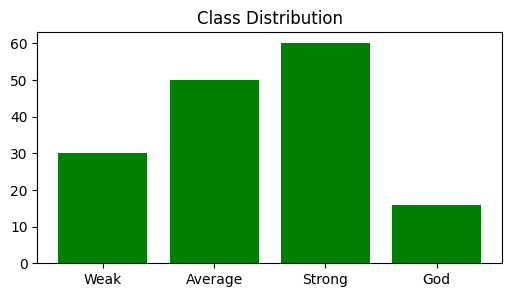

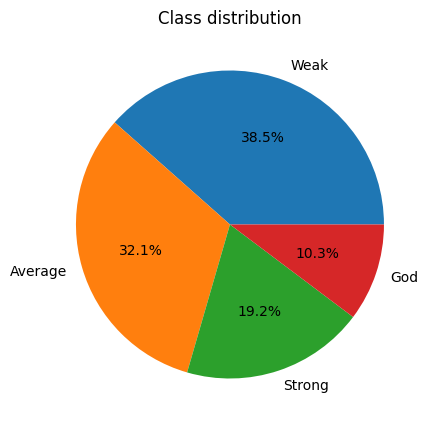

Stat Distribution: 


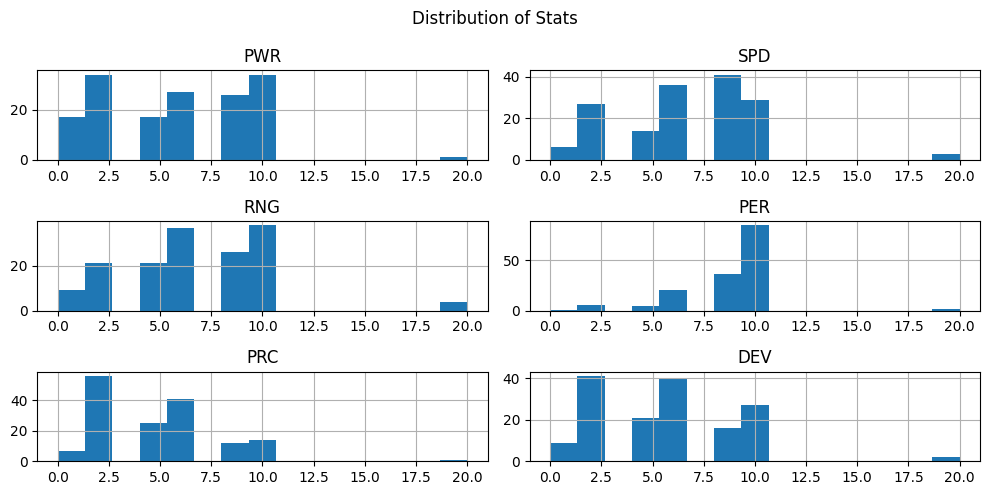

Boxplot: 


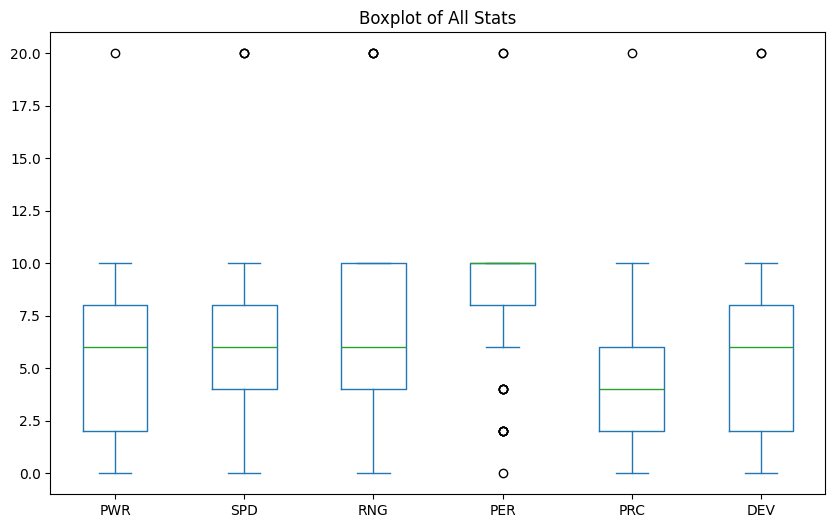

In [11]:
# Display class distribution
print('Class Distribution: ')
classDist(data)

# Display Stat Distribution
print('Stat Distribution: ')
statDist(data)

#Display boxplot for outliers
print('Boxplot: ')
boxPlot(data)

## After Balancing

In [12]:
# Balance Data
data = balanced_data

Class Distribution: 


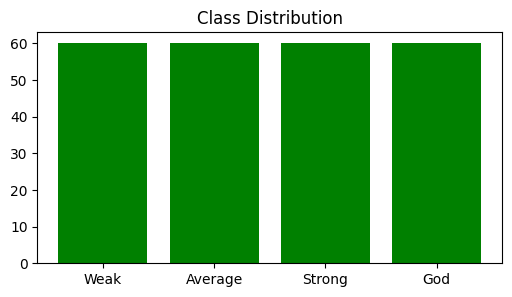

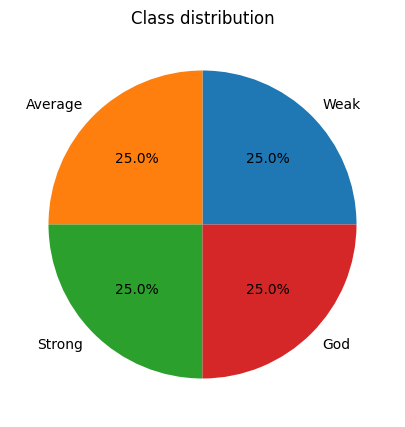

Stat Distribution: 


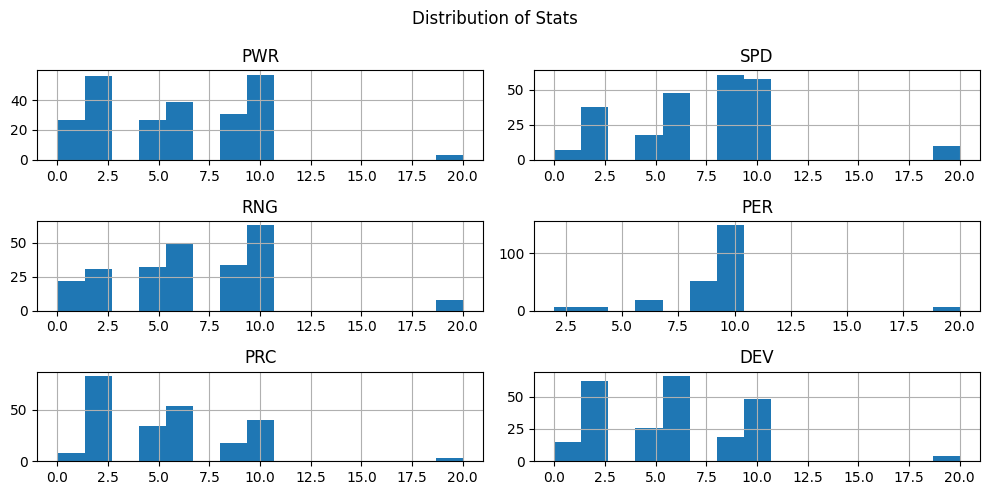

Boxplot: 


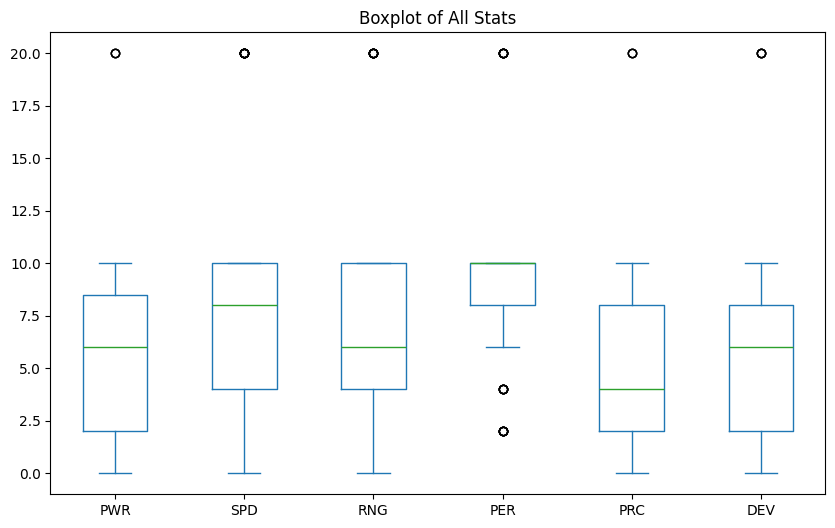

In [13]:
# Display class distribution
print('Class Distribution: ')
classDist(data)

# Display Stat Distribution
print('Stat Distribution: ')
statDist(data)

#Display boxplot for outliers
print('Boxplot: ')
boxPlot(data)

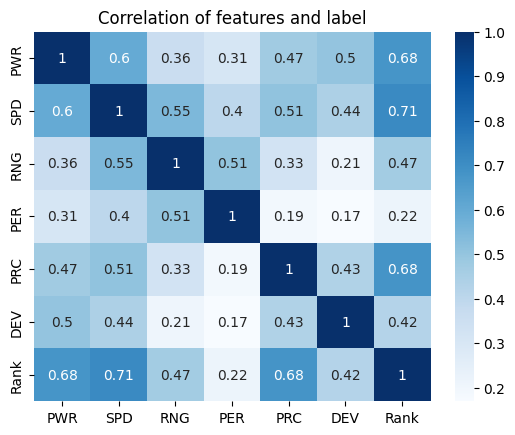

In [14]:
sns.heatmap(data.drop('Stand', axis=1).corr(), cmap='Blues', annot=True)
plt.title('Correlation of features and label')
plt.show()

# Model creation

In [15]:
x = data.drop(['Stand','Rank'], axis=1)
y = data['Rank']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Logistic Regression

In [17]:
lr_model = LogisticRegression(max_iter=500)

In [18]:
lr_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


## Random Forest

In [19]:
rf_model = RandomForestClassifier(n_estimators=110,random_state=42)

In [20]:
rf_model.fit(x_train,y_train)

,n_estimators,110
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## SVC

In [21]:
svc_model = SVC(kernel='linear', C=1.0, gamma='auto')

In [22]:
svc_model.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## KNN

In [23]:
knn_model = KNeighborsClassifier(weights='distance', n_neighbors=2)

In [24]:
knn_model.fit(x_train,y_train)

,n_neighbors,2
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## GBC

In [25]:
gbc_model = GradientBoostingClassifier(n_estimators=100,random_state=42, learning_rate=0.01, max_depth=10)

In [26]:
gbc_model.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.01
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,10
,min_impurity_decrease,0.0
,init,None


# Performance evaluation

In [27]:
results = {}

def performance_evaluation(title,model):
  print(f'Model Name: {title}')
  y_pred = model.predict(x_test)

  # test Accuracy Score
  test_accuracy = accuracy_score(y_test,y_pred)
  print(f'Model Accuracy Score: {test_accuracy}')

  # Confusion Matrix
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm,cmap='Blues',annot=True)
  plt.title('Confusion Matrix: ')
  plt.show()

  # Classification report
  class_report = classification_report(y_test,y_pred, output_dict=True)
  print(classification_report(y_test,y_pred))

  results[title] = {
      'accuracy': test_accuracy,
      'precision': class_report['macro avg']['precision'],
      'recall': class_report['macro avg']['recall'],
      'f1-score': class_report['macro avg']['f1-score']
  }

## Logistic Regression

Model Name: Logistic Regression Model
Model Accuracy Score: 0.9583333333333334


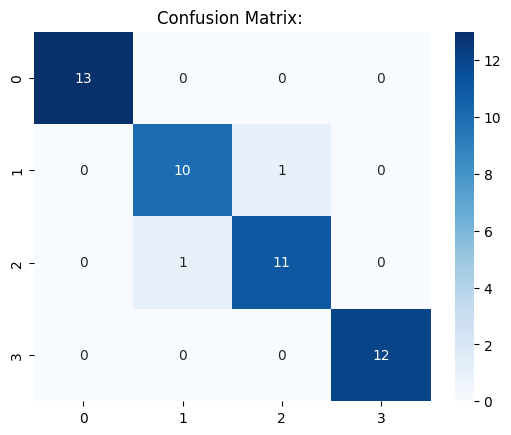

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.91      0.91      0.91        11
           2       0.92      0.92      0.92        12
           3       1.00      1.00      1.00        12

    accuracy                           0.96        48
   macro avg       0.96      0.96      0.96        48
weighted avg       0.96      0.96      0.96        48



In [28]:
performance_evaluation('Logistic Regression Model', lr_model)

## Random Forest

Model Name: Random Forest Classifier
Model Accuracy Score: 0.9791666666666666


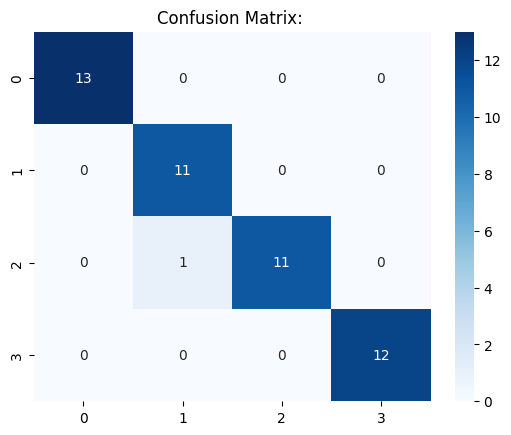

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        12

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



In [29]:
performance_evaluation('Random Forest Classifier', rf_model)

## SVC

Model Name: Support Vector Classifier
Model Accuracy Score: 0.9791666666666666


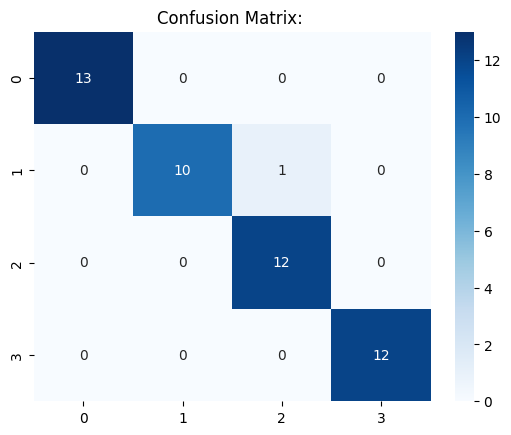

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00        12

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



In [30]:
performance_evaluation('Support Vector Classifier', svc_model)

## KNN

Model Name: K Nearest Neighbours
Model Accuracy Score: 0.9375


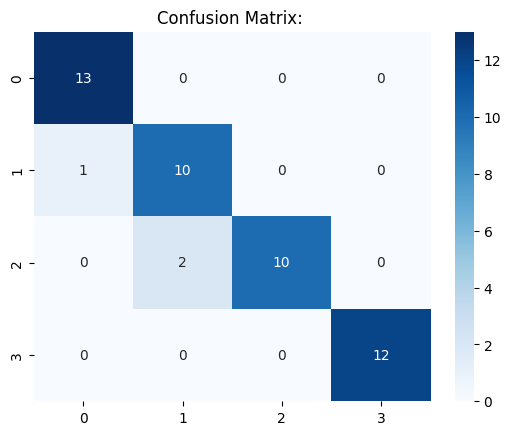

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.83      0.91      0.87        11
           2       1.00      0.83      0.91        12
           3       1.00      1.00      1.00        12

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48



In [31]:
performance_evaluation('K Nearest Neighbours', knn_model)

## GBC

Model Name: Gradient Boosting Classifier
Model Accuracy Score: 0.9791666666666666


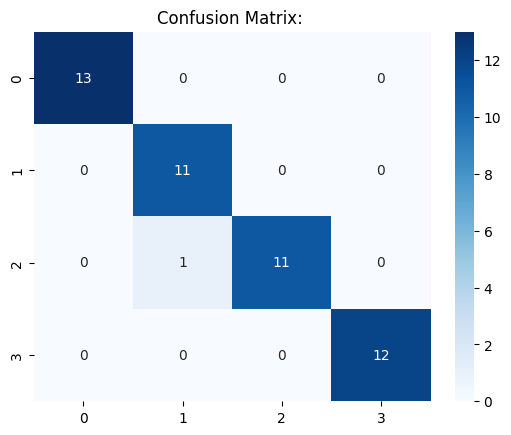

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12
           3       1.00      1.00      1.00        12

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



In [32]:
performance_evaluation('Gradient Boosting Classifier', gbc_model)

## All Model Comparison

<Figure size 1000x600 with 0 Axes>

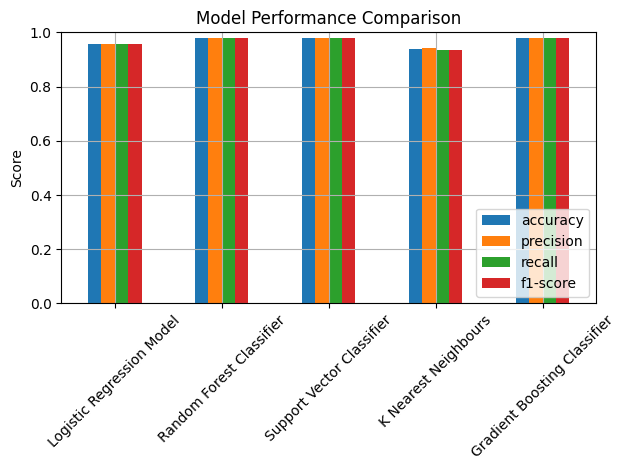

In [33]:
# Convert result dict to pandas dataframe and transpose so models are rows
df_results = pd.DataFrame(results).T

# Plot bar graph to compare models based on each metric
plt.figure(figsize=(10, 6))
df_results.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Unlabeled data prediction

In [34]:
encoded_map = { 'F':0, 'E':2 , 'D':4, 'C':6, 'B':8, 'A':10, 'Infi':20  }
encoded_class = { 0: 'Weak', 1: 'Average' , 2:'Strong', 3:'God' }

def detect_and_display(pwr,spd,rng,per,prc,dev, model):
  encoded_pwr = encoded_map[pwr]
  encoded_spd = encoded_map[spd]
  encoded_rng = encoded_map[rng]
  encoded_per = encoded_map[per]
  encoded_prc = encoded_map[prc]
  encoded_dev = encoded_map[dev]

  stats = np.array([[encoded_pwr,encoded_spd,encoded_rng,encoded_per,encoded_prc,encoded_dev]])

  prediction = model.predict(stats)

  print(f'Prediction: {prediction}, Rank: {encoded_class[prediction[0]]}')


In [35]:
pwr = input('PWR: ').capitalize()
spd = input('SPD: ').capitalize()
rng = input('RNG: ').capitalize()
per = input('PER: ').capitalize()
prc = input('PRC: ').capitalize()
dev = input('DEV: ').capitalize()

## LR Model

In [36]:
detect_and_display(pwr,spd,rng,per,prc,dev, lr_model)

KeyError: ''

## Random Forest Classifier

In [ ]:
detect_and_display(pwr,spd,rng,per,prc,dev, rf_model)

Prediction: [3], Rank: God


c:\Users\manpr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## SVC Model

In [ ]:
detect_and_display(pwr,spd,rng,per,prc,dev, svc_model)

Prediction: [3], Rank: God


c:\Users\manpr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## KNN Model

In [ ]:
detect_and_display(pwr,spd,rng,per,prc,dev, knn_model)

Prediction: [3], Rank: God


c:\Users\manpr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
